In [1]:
import numpy as np
import pandas as pd

In [2]:
advertising = pd.read_csv("advertising.csv")
advertising.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [3]:
advertising.shape

(200, 4)

In [4]:
advertising.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

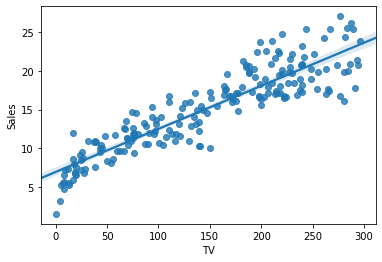

In [6]:
sns.regplot(x='TV', y='Sales', data=advertising)

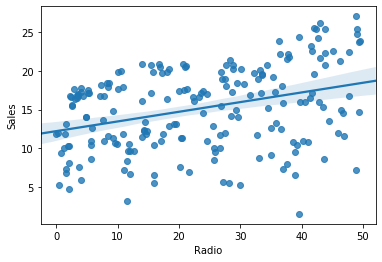

In [7]:
sns.regplot(x='Radio', y='Sales', data=advertising)

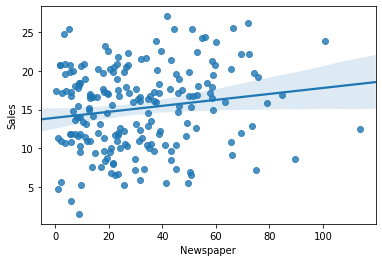

In [8]:
sns.regplot(x='Newspaper', y='Sales', data=advertising)

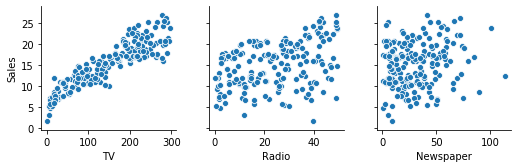

In [9]:
sns.pairplot(data=advertising, x_vars =['TV', 'Radio', 'Newspaper'], y_vars='Sales')

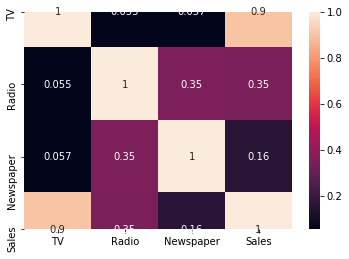

In [10]:
cores = advertising.corr()
sns.heatmap(cores, label=True,annot=True )

## build simple linear regression model



In [11]:
import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split

Steps
- Create x and y
- create train and test sets(70-30 or 80-20)
- Train your model on training set
- Evaluate the model(training set and test set)

In [12]:
# create x and y
X = advertising['TV'] ## predictive variables (can be multiple columns)
y = advertising['Sales']

In [13]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.70, random_state=100)
X_train.shape

(140,)

We are using statsmodel library for training our model. The equation for linear regression model is y= c+mx
The statsmodel library does not include c by default, therefore we have to add it manually sing the add_contant method. 

In [14]:
# training the model
X_train_sm = sm.add_constant(X_train)
X_train_sm.head()

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,const,TV
74,1.0,213.4
3,1.0,151.5
185,1.0,205.0
26,1.0,142.9
90,1.0,134.3


making the above change makes stats model think that we have a cofficient c multiplied by const and m1 multiplied by TV(m1). now since const is all 1s we actually made the adjustment of c i.e the intercept in the model. 
- y = c + m1.X1
- y= c.const+m1.X1 - this is the model statsmodel will learn now. 

In [15]:
# fitting the mmodel
# OLS - ordinary least squares - sum of sqaures of errors (RSS)
lr = sm.OLS(y_train, X_train_sm) #create object/instance
lr_model = lr.fit()


In [16]:
lr_model.params

const    6.948683
TV       0.054546
dtype: float64

Coffiecient of const is the y-intercept and that of TV is slope. so line is

Sales = 6.94 + 0.05.TV

slope is 0.05 which is positive. this can be seen in the scatter plot as well

In [17]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Sat, 04 Apr 2020   Prob (F-statistic):           1.52e-52
Time:                        14:25:05   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.000       6.188       7.709
TV             0.0545      0.002     24.722      0.000       0.050       0.059
==============================================================================
Omnibus:                        0.027   Durbin-Watson:                   2.196
Prob(Omnibus):                  0.987   Jarque-Bera (JB):                0.150
Skew:                          -0.006   Prob(JB):                        0.928
Kurtosis:                       2.840   Cond. No.                         328.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

1. cooef and p-value m- p-value =o which means there is relation bwtween variables
2.  R-squared is 81.6% , very high
3. p(F-statisitc) is low => the fit is not by chance

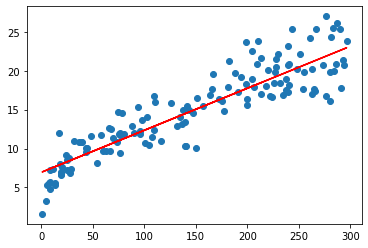

In [18]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 6.948+0.054*X_train, 'r')

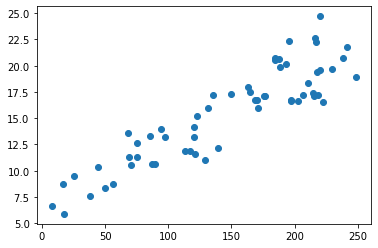

In [19]:
plt.scatter(X_test, y_test)

### Step 3 Residual Analysis

In [20]:
# error = f(y_train, y_train_pred)
# error is a function of y_train and t_train_pred

y_train_pred = lr_model.predict(X_train_sm)
y_train_pred 

74     18.588747
3      15.212365
185    18.130563
26     14.743271
90     14.274178
         ...    
87     12.986898
103    17.197830
67     14.546907
24     10.346884
8       7.417777
Length: 140, dtype: float64

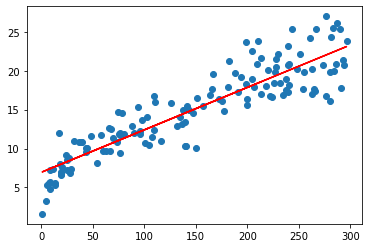

In [21]:
plt.scatter(X_train, y_train)
plt.plot(X_train, y_train_pred, 'r')

In [22]:
residuals = y_train-y_train_pred

Text(0.5, 1.0, 'Residual Plot')

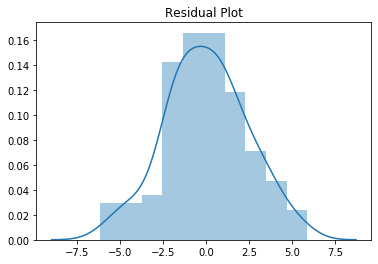

In [23]:
plt.figure()
sns.distplot(residuals)
plt.title('Residual Plot')

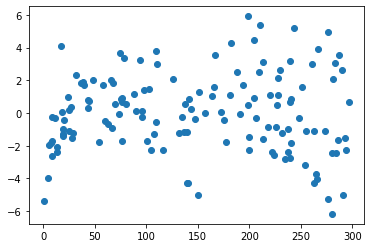

In [24]:
# look for patterns in residuals (we should not be able to identify any solid patterns)
plt.scatter(X_train, residuals)

## Step 4. predictions and evaluation on the Test Set

In [25]:
# make predictions on the test set (y_test_pred)


In [26]:
X_test_sm = sm.add_constant(X_test)
X_test_sm.head()

y_test_pred  = lr_model.predict(X_test_sm)

In [27]:
# evaluate the model, r-squared on th

In [28]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [29]:
r2=r2_score(y_true=y_test, y_pred =y_test_pred)
r2

0.7921031601245658

In [30]:
mean_squared_error(y_true=y_test, y_pred =y_test_pred)

4.077556371826956

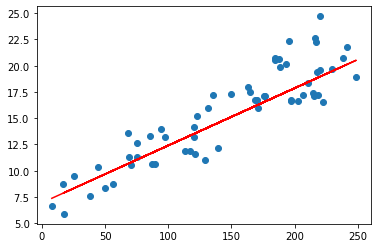

In [31]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_test_pred, 'r')

# Using sklearn for Linear regression

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.70, random_state=100)

In [33]:
X_train.shape

(140,)

In [34]:
# reshape to 140,1
X_train_lm = X_train.values.reshape(-1, 1) #-1  says i dont care about rows give me 1 column
X_train_lm.shape

(140, 1)

In [35]:
X_test_lm = X_test.values.reshape(-1, 1) #-1  says i dont care about rows give me 1 column
X_test_lm.shape

(60, 1)

### steps in skelearn model building
1. create and object of linear regression (or any model)
2. fit the model
3. see the params, make predictions(train , test)
4. evaluate model(r2, etc)

In [36]:
from sklearn.linear_model import LinearRegression

In [37]:
# 1
lm = LinearRegression()

#2 
lm.fit(X_train_lm, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [38]:
# 3 see params and make predictions
print(lm.coef_)
print(lm.intercept_)

[0.05454575]
6.948683200001357


In [39]:
# 4 make predictions
y_train_pred = lm.predict(X_train_lm)
y_test_pred = lm.predict(X_test_lm)

In [40]:
# evaluate
print(r2_score(y_true=y_train, y_pred = y_train_pred))
r2_score(y_true=y_test, y_pred = y_test_pred)

0.8157933136480389


0.7921031601245662


# Gradient Descent


In [41]:
housing = pd.read_csv('Housing.csv')
housing.head()

FileNotFoundError: [Errno 2] File b'Housing.csv' does not exist: b'Housing.csv'